In [232]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import math

In [22]:
file = '/home/ifire/EEG/H-IoT-Golob-Rice-Compression-Automation/data/4b5c_filtered.edf'
data1 = mne.io.read_raw_edf(file)
data1.info

Extracting EDF parameters from /home/ifire/EEG/H-IoT-Golob-Rice-Compression-Automation/data/4b5c_filtered.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


Measurement date,"April 27, 2022 07:50:40 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,125.00 Hz
Highpass,0.50 Hz
Lowpass,30.00 Hz


In [23]:
file2  = '/home/ifire/EEG/H-IoT-Golob-Rice-Compression-Automation/data/test_flex_01_0317_02.edf'
data2 = mne.io.read_raw_edf(file2)
data2.info

Extracting EDF parameters from /home/ifire/EEG/H-IoT-Golob-Rice-Compression-Automation/data/test_flex_01_0317_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


Measurement date,"March 17, 2022 16:51:43 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,6 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,125.00 Hz
Highpass,0.00 Hz
Lowpass,62.50 Hz


In [24]:
file3  = '/home/ifire/EEG/H-IoT-Golob-Rice-Compression-Automation/data/test_flex_02_0317_01.edf'
data3 = mne.io.read_raw_edf(file3)
data3.info

Extracting EDF parameters from /home/ifire/EEG/H-IoT-Golob-Rice-Compression-Automation/data/test_flex_02_0317_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


Measurement date,"March 17, 2022 15:54:30 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,6 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,125.00 Hz
Highpass,0.00 Hz
Lowpass,62.50 Hz


In [25]:
file4  = '/home/ifire/EEG/H-IoT-Golob-Rice-Compression-Automation/data/test_flex_02_0317_02.edf'
data4 = mne.io.read_raw_edf(file4)
data4.info

Extracting EDF parameters from /home/ifire/EEG/H-IoT-Golob-Rice-Compression-Automation/data/test_flex_02_0317_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


Measurement date,"March 17, 2022 16:37:43 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,6 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,125.00 Hz
Highpass,0.00 Hz
Lowpass,62.50 Hz


Effective window size : 16.384 (s)


/tmp/ipykernel_987887/3812573340.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data1.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=True)
/home/ifire/.local/lib/python3.10/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


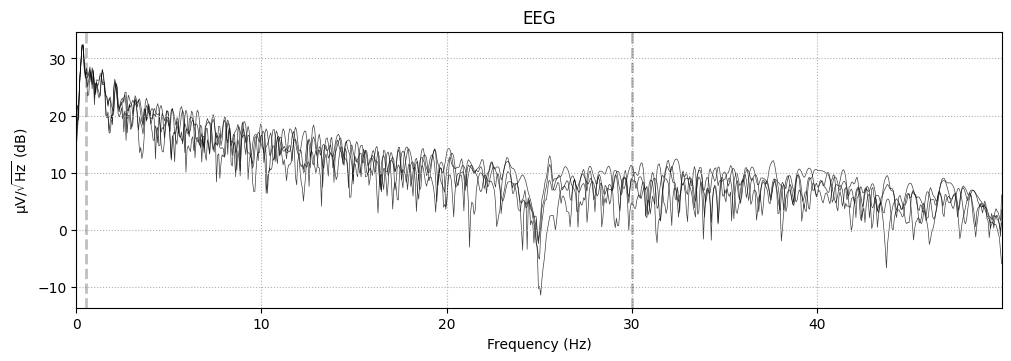

In [51]:
data1.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=True)

Setting up low-pass filter at 60 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 20 (effective, after forward-backward)
- Cutoff at 60.00 Hz: -6.02 dB



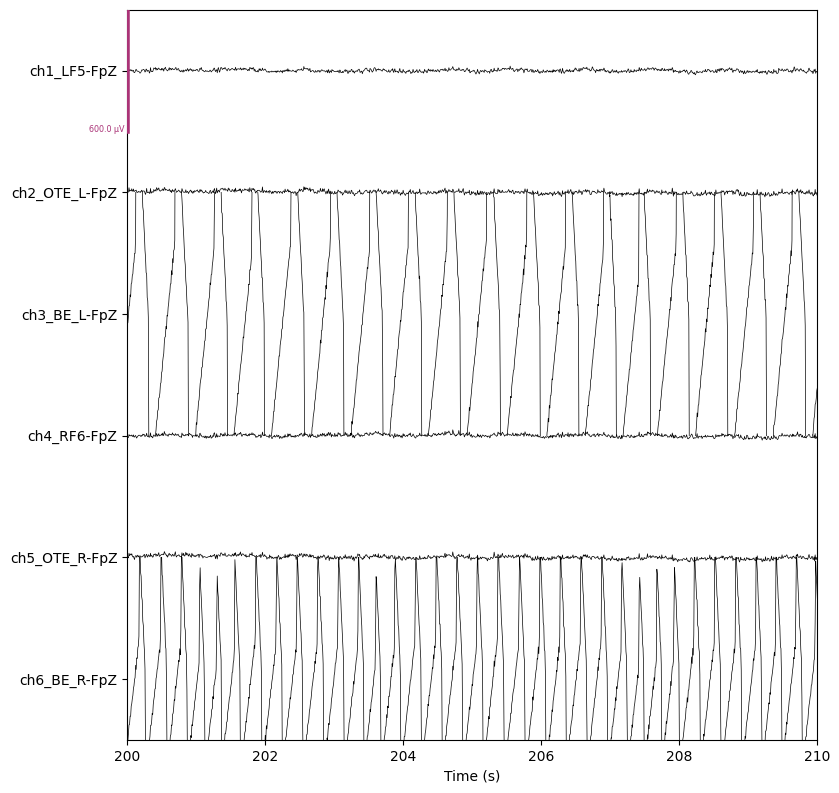

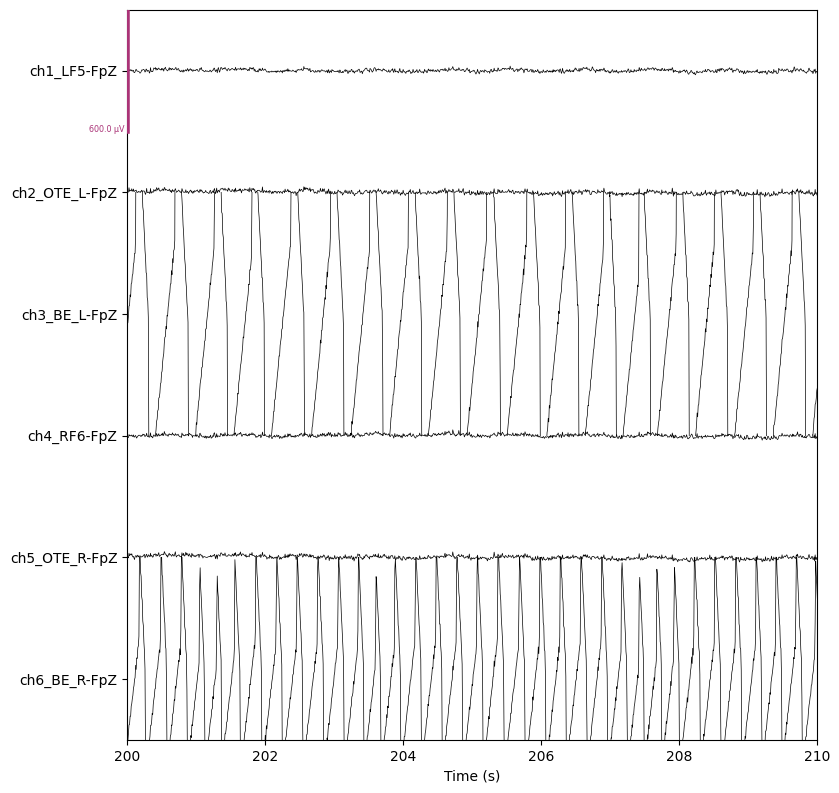

In [107]:
data2.plot( start=200,  scalings='0.0003', clipping=1.0, remove_dc=True, lowpass =60, show_scrollbars=False, filtorder = 10, theme='auto')

Setting up low-pass filter at 60 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 20 (effective, after forward-backward)
- Cutoff at 60.00 Hz: -6.02 dB



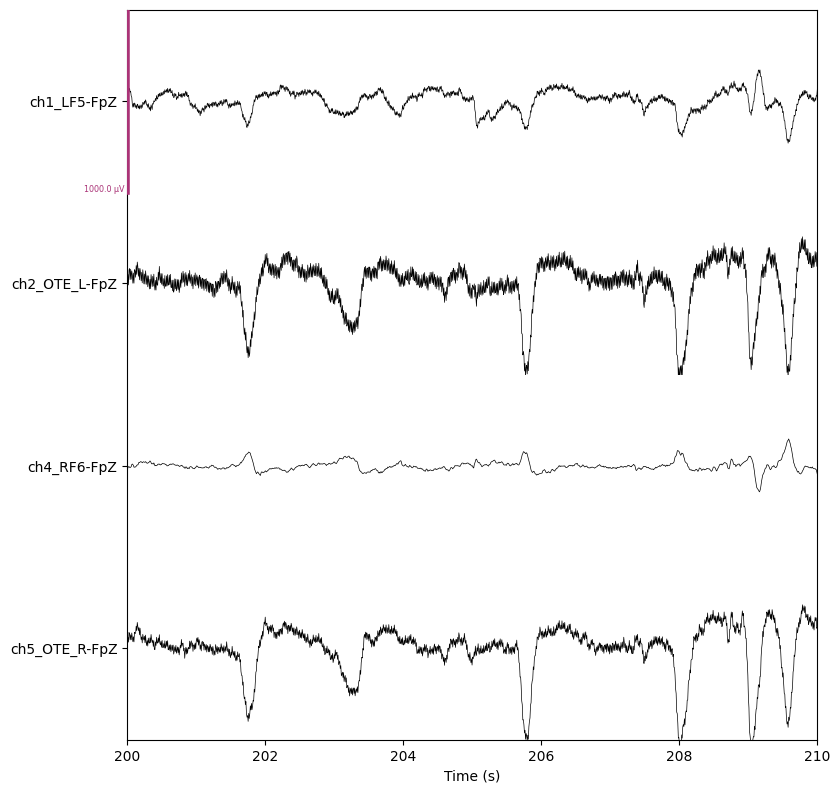

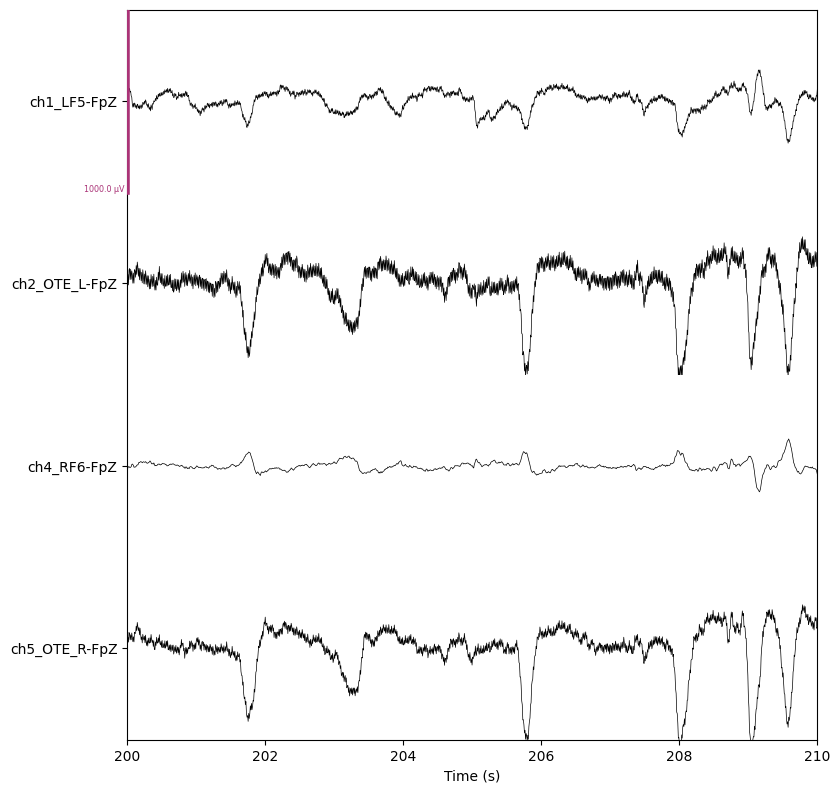

In [114]:
data1.plot( start=200,  scalings='0.0005', clipping=0.5, remove_dc=True, lowpass =60, show_scrollbars=False, filtorder = 10, theme='auto')

Setting up low-pass filter at 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Filter length: 165 samples (1.320 s)



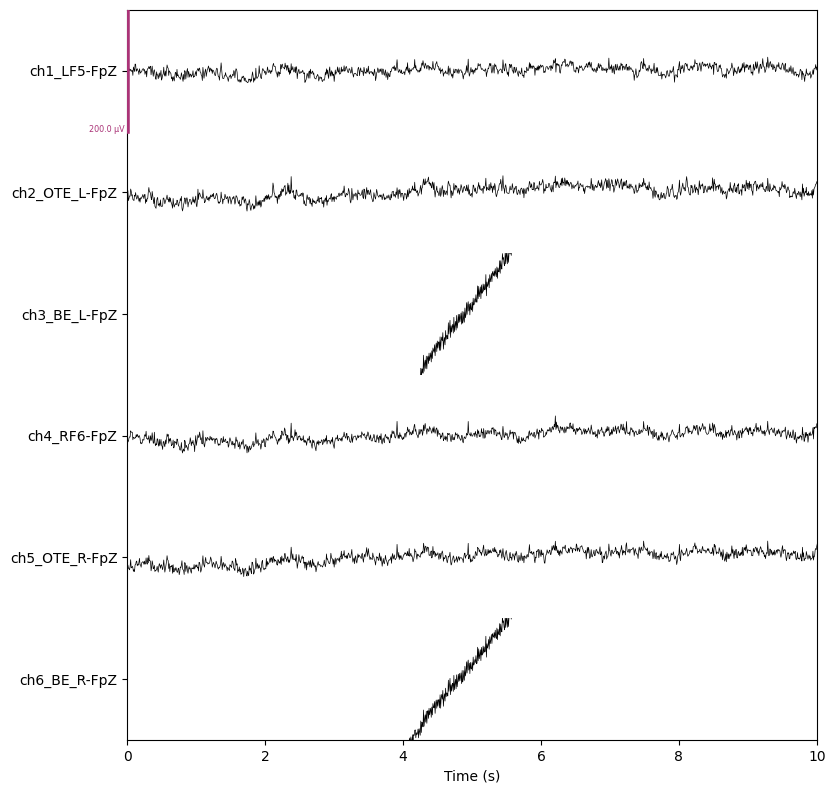

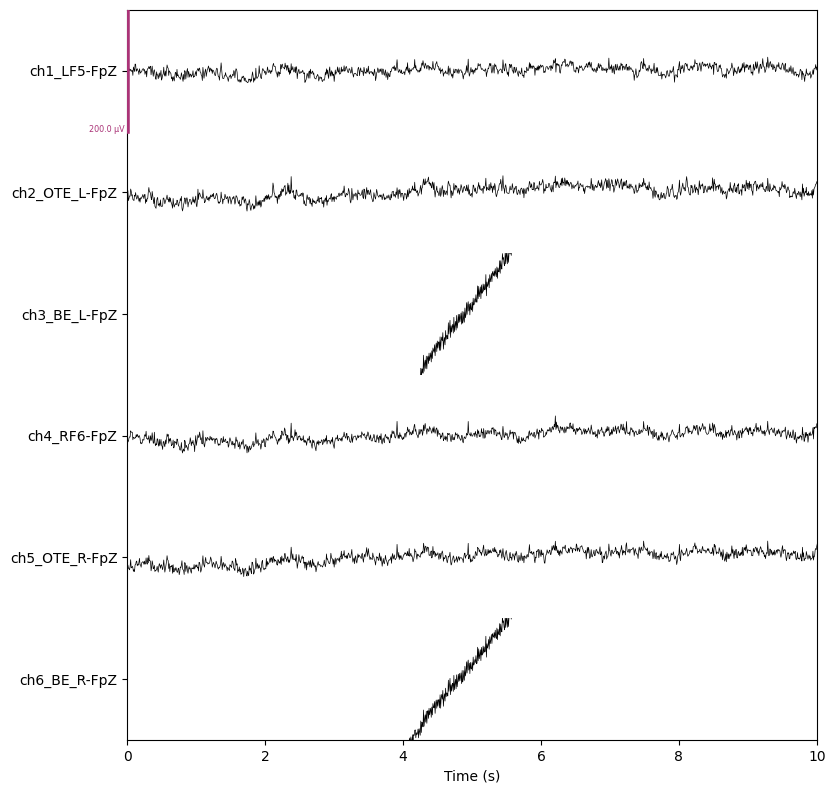

In [119]:
data4.plot( scalings='0.0001', clipping=0.5, remove_dc=True, lowpass =60, show_scrollbars=False, filtorder = 0, theme='auto')

In [176]:
## data control parameters

EEG_raw_data = data1.get_data()
SCALE=1e3
raw_data= EEG_raw_data*SCALE
MAX_LENGTH=70000
N_HIST_BIN=20

In [275]:
EEG_raw_data[0].mean(), raw_data[0].max()

(2.758058522319544e-07, 23.51707503135729)

In [180]:
type(raw_data)

numpy.ndarray

In [177]:
channel_id_0 = 0
channel_id_1 = 1
channel_id_2 = 2
channel_id_3 = 3
channels = data1.ch_names

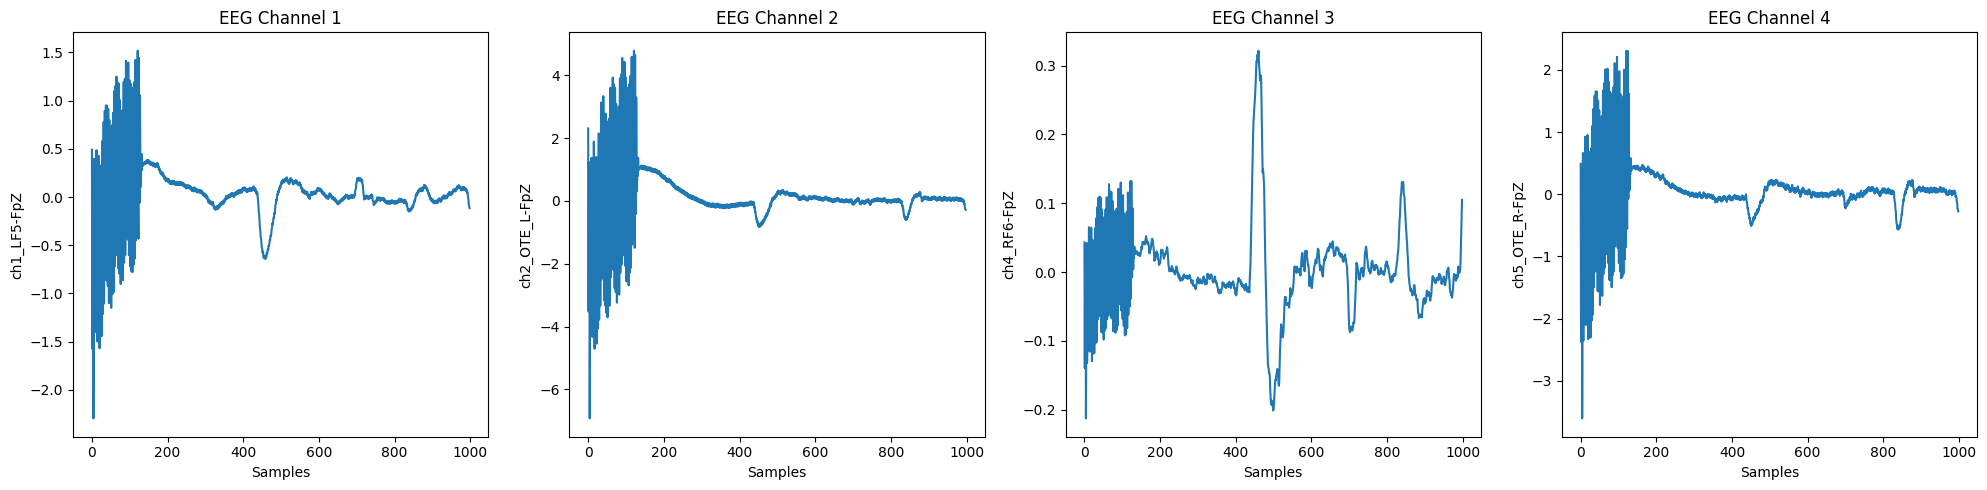

In [182]:
import matplotlib.pyplot as plt

# Assuming 'raw_data' is your EEG data array and 'channels' is a list of channel names
# Create a figure with 1 row and 4 columns of subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Adjust the figsize to suit your needs

# Define MAX_LENGTH according to your data length
MAX_LENGTH = 1000

# Plotting on the first subplot
channel_id_0 = 0  # Update this to your actual channel index
axs[0].plot(raw_data[channel_id_0, 1:MAX_LENGTH])
axs[0].set_ylabel(channels[channel_id_0])
axs[0].set_xlabel("Samples")
axs[0].set_title("EEG Channel 1")

# Plotting on the second subplot
channel_id_1 = 1  # Update this to your actual channel index
axs[1].plot(raw_data[channel_id_1, 1:MAX_LENGTH])
axs[1].set_ylabel(channels[channel_id_1])
axs[1].set_xlabel("Samples")
axs[1].set_title("EEG Channel 2")

# Plotting on the third subplot
channel_id_2 = 2  # Update this to your actual channel index
axs[2].plot(raw_data[channel_id_2, 1:MAX_LENGTH])
axs[2].set_ylabel(channels[channel_id_2])
axs[2].set_xlabel("Samples")
axs[2].set_title("EEG Channel 3")

# Plotting on the fourth subplot
channel_id_3 = 3  # Update this to your actual channel index
axs[3].plot(raw_data[channel_id_3, 1:MAX_LENGTH])
axs[3].set_ylabel(channels[channel_id_3])
axs[3].set_xlabel("Samples")
axs[3].set_title("EEG Channel 4")

# Improving layout and showing the plot
fig.tight_layout()  # Improves the spacing between plots
plt.show()


In [228]:
raw_data[0].min()

-25.900035031357287

In [229]:
'''
purpose of the code below is to offset the dc value by minimum value available in the dataset 
so we add it to all the values to shift it up so that all the values are positive which is a requirement in the golomb rice coding
'''
non_neg_vals_channel_1 = []
for val in raw_data[0]:
    if val >= 0:
        non_neg_vals_channel_1.append(val+ 26)
    else:
        non_neg_vals_channel_1.append(val+26)
    

In [326]:
non_neg_vals_channel_1 = np.array(non_neg_vals_channel_1)
non_neg_vals_channel_1.min(), non_neg_vals_channel_1.max(), non_neg_vals_channel_1.mean()

(0.09996496864271265, 49.517075031357294, 26.000275805852237)

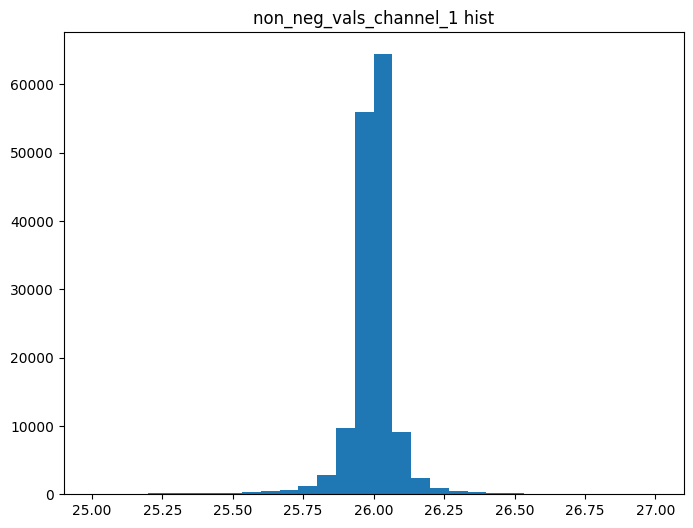

In [359]:
plt.hist(non_neg_vals_channel_1, bins=30, range=[25, 27])
plt.show()
plt.title("non_neg_vals_channel_1 hist");

In [343]:
EEG_raw_data[0].min(), EEG_raw_data[0].max(), EEG_raw_data[0].mean()

(-0.025900035031357287, 0.02351707503135729, 2.758058522319544e-07)

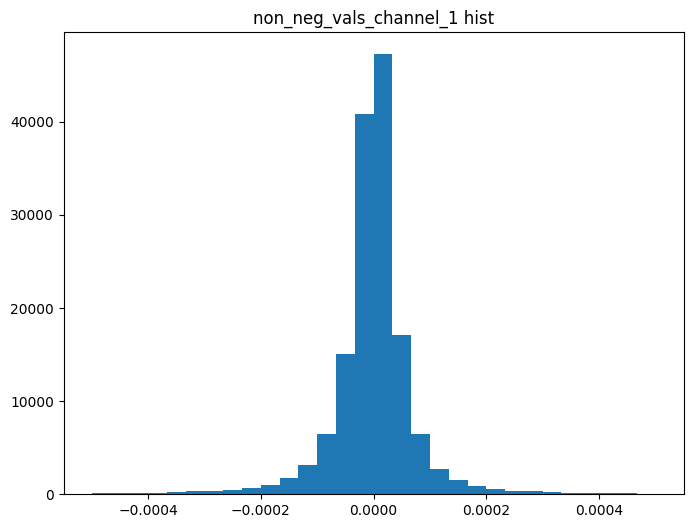

In [360]:
plt.hist(EEG_raw_data[0], bins=30, range=[-0.0005, 0.0005])
plt.show()
plt.title("EEG_raw_data hist");

In [ ]:
differential_data = raw_data[0, :-1] - raw_data[0, 1:]
differential_data.min(), differential_data.max(), differential_data.mean()

(-8.27830898115511, 8.867285580529488, 0.00011167348592149606)

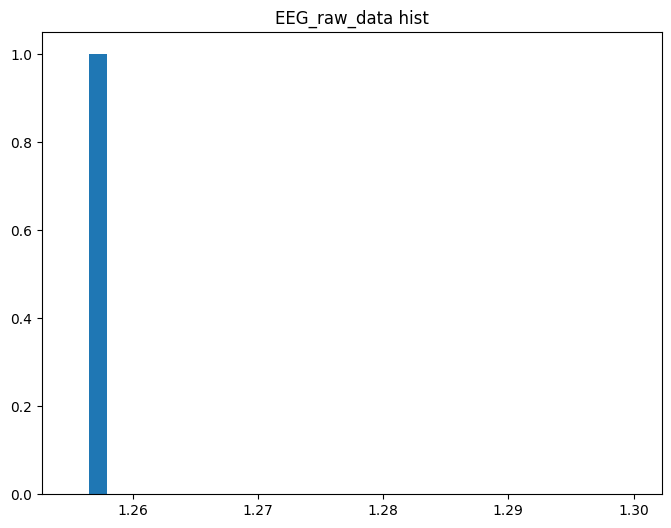

In [361]:
plt.hist(differential_data[0], bins=30, range=[1.255, 1.3])
plt.show()
plt.title("differential_data hist");

### we will continue to use the non_neg_data for its suitability 
    ~it follows a goog geometric patter
    ~the values are non-neg which is a reuirement in golomb-rice coding
    ~but we need to make values integer as golomb rice code is good only for integer values

In [ ]:
'''as the mean value of the data series is 26.000 we can take the golomb parameter as 2^K as 16 and we will round that up to 5'''
math.ceil(math.log2(26.000))

5

In [ ]:
'''
Guessing the ideeal Golomb-Rice parameter using these publications

1)Low-complexity lossless compression of hyper spectral imagery via adaptive filtering- M. Klimesh,
2)Selecting the Golomb parameter in Rice coding,  A. Kiely
'''

In [ ]:
k_min = math.floor(math.log2((2/3) * (non_neg_vals_channel_1.mean()+ 1)))
k_max = math.ceil(math.log2(non_neg_vals_channel_1.mean()))
numerator  = math.log10( (math.sqrt(5)+1)/2 -1)
denominator = math.log10(non_neg_vals_channel_1.mean() / (non_neg_vals_channel_1.mean()+1))
k_geo  =  1 + math.floor(math.log2(numerator/denominator))

'''so the idela parameter can be here is the k_geo '''
k_min, k_max, k_geo

(4, 5, 4)

In [ ]:
'''we will take k_geo as the ideal golomb parameter'''
golomb_parameter = k_geo

In [ ]:
def golomb_encode(data:float, golomb_parameter:int)-> str:
    """
    Encode a non-negative integer x using Golomb-Rice coding with parameter k.

    Parameters:
    x (int): The non-negative integer to encode.
    k (int): The parameter k in Golomb-Rice coding, which determines the
             divisor M as 2^k.

    Returns:
    str: The Golomb-Rice encoded binary string.
    """
    
    quotionet  = data >> golomb_parameter   # Equivalent to integer division of x by 2^k
    remainder = data & ((1<< golomb_parameter)-1)       # Equivalent to x mod 2^k
    
    unary_code =  '1'*quotionet + '0'
    remainder = bin(remainder)[2:].zfill(golomb_parameter)
    
    return unary_code + remainder
    
    

In [ ]:
int(34.5534)

34

In [ ]:
differential_data.max()

8.867285580529488

In [ ]:
raw_data[0].mean()

0.0002758058522319542

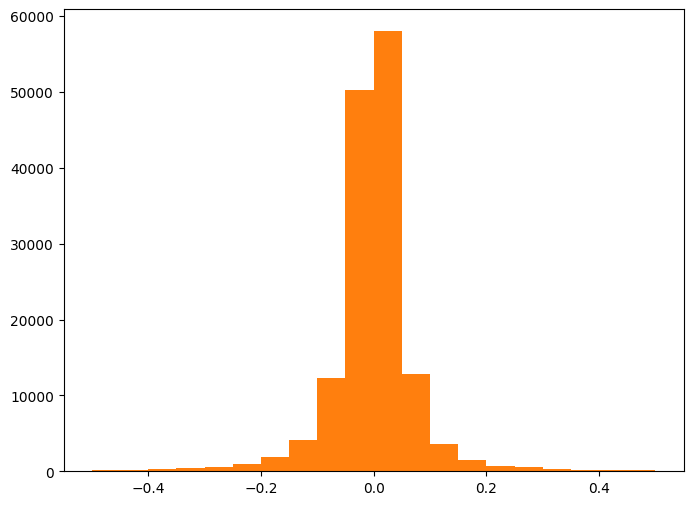

In [ ]:
plt.hist(raw_data[0], bins=20, range=[-0.5, 0.5])
plt.show()

In [ ]:
differential_data.mean()

0.00011167348592149606

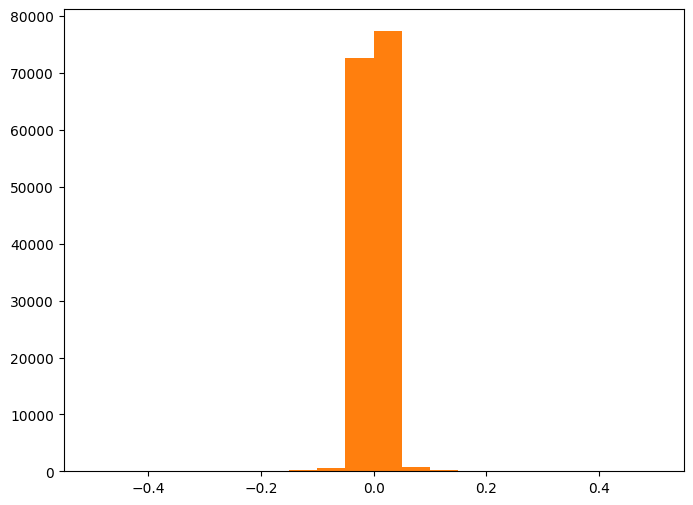

In [ ]:
plt.hist(differential_data, bins=20, range=[-0.5, 0.5])
plt.show()

In [ ]:
packed = struct.pack('>f', 3.14)
